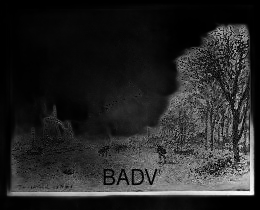

In [39]:
# !pip install rembg --user
# Importing Required Modules 
from rembg.bg import remove, new_session
from PIL import Image 

# Store path of the image in the variable input_path 
# input_path = "nk_collection_meubels_cleaned\meubel_6.jpg"
input_path = "scraped_images_grayscaled_big\\0030_45-12_id=cp163432_badv.jpg"

# Store path of the output image in the variable output_path 
output_path = 'nk_nob\meubel_1.jpg' 

# Processing the image 
input = Image.open(input_path) 

# Removing the background from the given Image 
#import new_session

from rembg.bg import remove, new_session

#create a new session by passing name of the model from one of the following

#["u2net", "u2netp", "u2net_human_seg", "u2net_cloth_seg", "silueta"]

my_session = new_session("isnet-general-use")

#set session to your custom session

output = remove(input, session=my_session)

output_rgb = output.convert('RGB')
#Saving the image in the given path 
output_rgb

In [6]:
# not good enough
import cv2
import numpy as np

# load image
for i in range(8):
    img = cv2.imread('nk_collection_meubels_cleaned\meubel_'+ str(i+1) +'.jpg')

    # convert to graky
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold input image as mask
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # negate mask
    mask = 255 - mask

    # apply morphology to remove isolated extraneous noise
    # use borderconstant of black since foreground touches the edges
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # anti-alias the mask -- blur then stretch
    # blur alpha channel
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

    # linear stretch so that 127.5 goes to 0, but 255 stays 255
    mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

    # put mask into alpha channel
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    # save resulting masked image
    cv2.imwrite('nk_nob\meubel_'+ str(i+1) +'.jpg', result)

# # display result, though it won't show transparency
# cv2.imshow("INPUT", img)
# cv2.imshow("GRAY", gray)
# cv2.imshow("MASK", mask)
# cv2.imshow("RESULT", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()